In [1]:
print("Hello, world!")


Hello, world!


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import re

# Load the uploaded Excel file to check its structure
file_path = '/Users/hongjiewang/Documents/Dragon Boat/DragonBoat_PKU/2025-04-28至2025-05-11_打卡记录.xlsx'
xls = pd.ExcelFile(file_path)
xls.sheet_names


['2025年04月28日',
 '2025年04月29日',
 '2025年04月30日',
 '2025年05月01日',
 '2025年05月02日',
 '2025年05月03日',
 '2025年05月04日',
 '2025年05月05日',
 '2025年05月06日',
 '2025年05月07日',
 '2025年05月08日',
 '2025年05月09日',
 '2025年05月10日',
 '2025年05月11日']

In [32]:
import re

# 准备统计总分
total_scores = {}

# 遍历7天的打卡记录
for sheet in xls.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    # 保留姓名和打卡类型两列
    df = df[['姓名', '打卡类型']].dropna(subset=['打卡类型'])
    
    # 提取打卡类型中的分数字段
    for _, row in df.iterrows():
        name = row['姓名']
        match = re.search(r'\+(\d+)', str(row['打卡类型']))
        score = int(match.group(1)) if match else 0
        total_scores[name] = total_scores.get(name, 0) + score

# # 转为DataFrame，方便后续处理
score_df = pd.DataFrame(list(total_scores.items()), columns=['姓名', '总分']).sort_values(by='总分', ascending=False).reset_index(drop=True)
# import ace_tools as tools; tools.display_dataframe_to_user(name="每个人7天打卡总分", dataframe=score_df)

score_df

,姓名,总分
0,小雨,109
1,杜广延,100
2,吕毅,85
3,谭世茵,81
4,冯莎莎,80
5,王红洁,80
6,江智豪,80
7,赵朝熠,65
8,石砾,65
9,Lancerasd,60


/var/folders/t6/0lgrttrx6xv07bp4x41c07900000gn/T/ipykernel_32287/1028111647.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='姓名', y='总分', data=score_df, palette='spring', edgecolor='black')


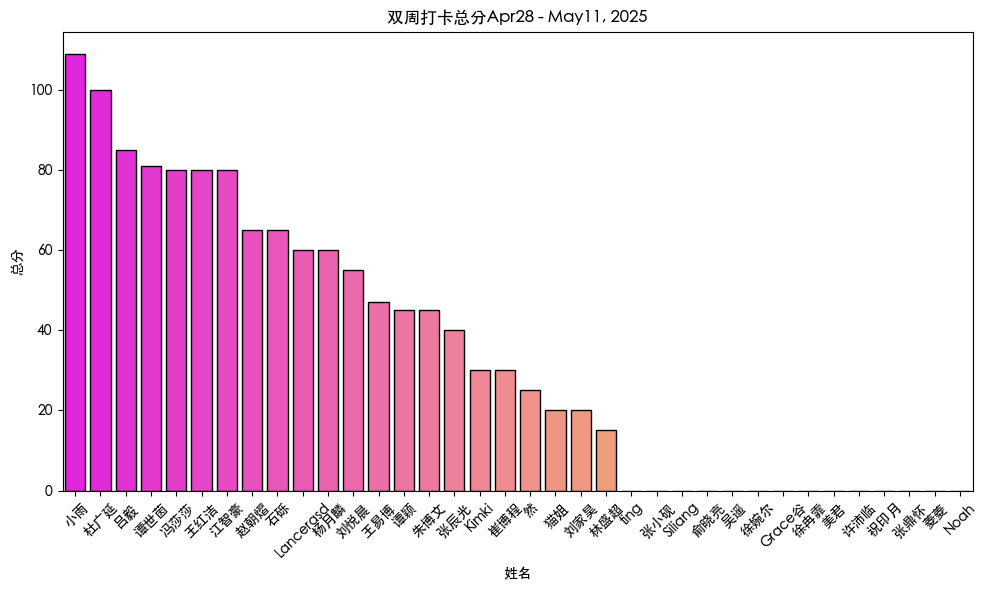

In [34]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Heiti TC'  # 黑体，支持中文

# import matplotlib.font_manager as fm
# for font in fm.fontManager.ttflist:
#     if 'SC' in font.name or 'Song' in font.name or 'Hei' in font.name:
#         print(font.name)



# 图1：柱状图 - 总分排名
plt.figure(figsize=(10, 6))
sns.barplot(x='姓名', y='总分', data=score_df, palette='spring', edgecolor='black') 
# plt.bar(score_df['姓名'], score_df['总分'])
plt.xlabel('姓名')
plt.ylabel('总分')
plt.title('双周打卡总分Apr28 - May11, 2025')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('打卡总分排名_柱状图.png')
plt.show()



In [36]:
# 用完整sheet名对应日期
# day_mapping = {
#     '2025年03月17日': '第1天',
#     '2025年03月18日': '第2天',
#     '2025年03月19日': '第3天',
#     '2025年03月20日': '第4天',
#     '2025年03月21日': '第5天',
#     '2025年03月22日': '第6天',
#     '2025年03月23日': '第7天',
#     '2025年03月24日': '第8天',
#     '2025年03月25日': '第9天',
#     '2025年03月26日': '第10天',
#     '2025年03月27日': '第11天',
#     '2025年03月28日': '第12天',
#     '2025年03月29日': '第13天',
#     '2025年03月30日': '第14天',
# }

day_mapping = {
    '2025年04月28日': '4月28日',
    '2025年04月29日': '4月29日',
    '2025年04月30日': '4月30日',
    '2025年05月01日': '5月01日',
    '2025年05月02日': '5月02日',
    '2025年05月03日': '5月03日',
    '2025年05月04日': '5月04日',
    '2025年05月05日': '5月05日',
    '2025年05月06日': '5月06日',
    '2025年05月07日': '5月07日',
    '2025年05月08日': '5月08日',
    '2025年05月09日': '5月09日',
    '2025年05月10日': '5月10日',
    '2025年05月11日': '5月11日',
}

# 初始化每日得分DataFrame
daily_scores = {}

for sheet in xls.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    df = df[['姓名', '打卡类型']].dropna(subset=['打卡类型'])

    # 提取分数
    day_score = df.copy()
    day_score['得分'] = df['打卡类型'].str.extract(r'\+(\d+)').astype(float).fillna(0)
    daily_sum = day_score.groupby('姓名')['得分'].sum().reset_index()
    daily_sum = daily_sum.rename(columns={'得分': day_mapping[sheet]})
    daily_scores[day_mapping[sheet]] = daily_sum

# 合并所有天的分数
all_days = list(day_mapping.values())
final_df = daily_scores[all_days[0]]
for d in all_days[1:]:
    final_df = pd.merge(final_df, daily_scores[d], on='姓名', how='outer')

# 填充空值为0，并计算总分
final_df = final_df.fillna(0)
# score_columns = [col for col in final_df.columns if '4月' in col]
score_columns = [col for col in final_df.columns if '4月' in col or '5月' in col]

final_df['总分'] = final_df[score_columns].sum(axis=1)
final_df = final_df.sort_values(by='总分', ascending=False).reset_index(drop=True)
final_df.index += 1  # 排名从1开始
final_df.reset_index(inplace=True)
final_df = final_df.rename(columns={'index': '排名'})


final_df
# import ace_tools as tools; tools.display_dataframe_to_user(name="打卡总榜（含第1天、第2天、第7天和总分）", dataframe=final_df[['排名', '姓名', '第1天', '第2天', '第7天', '总分']])


,排名,姓名,4月28日,4月29日,4月30日,5月01日,5月02日,5月03日,5月04日,5月05日,5月06日,5月07日,5月08日,5月09日,5月10日,5月11日,总分
0,1,小雨,7.0,7.0,7.0,7.0,20.0,7.0,20.0,7.0,0.0,7.0,20.0,0.0,0.0,0.0,109.0
1,2,杜广延,0.0,5.0,5.0,20.0,0.0,5.0,20.0,0.0,0.0,0.0,20.0,5.0,20.0,0.0,100.0
2,3,吕毅,0.0,0.0,0.0,7.0,7.0,0.0,7.0,5.0,0.0,5.0,7.0,7.0,20.0,20.0,85.0
3,4,谭世茵,0.0,0.0,7.0,0.0,7.0,0.0,20.0,0.0,0.0,0.0,20.0,7.0,20.0,0.0,81.0
4,5,冯莎莎,0.0,5.0,0.0,20.0,5.0,5.0,20.0,0.0,5.0,0.0,0.0,0.0,20.0,0.0,80.0
5,6,江智豪,0.0,0.0,5.0,5.0,0.0,0.0,20.0,5.0,5.0,0.0,20.0,0.0,20.0,0.0,80.0
6,7,王红洁,5.0,0.0,5.0,20.0,0.0,5.0,20.0,0.0,5.0,0.0,20.0,0.0,0.0,0.0,80.0
7,8,赵朝熠,5.0,5.0,5.0,5.0,20.0,0.0,5.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,65.0
8,9,石砾,0.0,0.0,0.0,0.0,0.0,5.0,20.0,0.0,0.0,0.0,20.0,0.0,20.0,0.0,65.0
9,10,杨月麟,0.0,0.0,0.0,20.0,0.0,0.0,20.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,60.0


In [38]:
# from matplotlib import font_manager
# # font_path = '/System/Library/Fonts/Supplemental/NotoSansCJK-Regular.ttf'  # 你机器上的中文字体路径
# font_path = '/System/Library/Fonts/Supplemental/NotoSansKhojki-Regular.ttf'
# my_font = font_manager.FontProperties(fname=font_path)

# plt.xlabel('姓名', fontproperties=my_font)
# plt.ylabel('总分', fontproperties=my_font)
# plt.title('双周打卡总分排名', fontproperties=my_font)
# plt.xticks(rotation=45, fontproperties=my_font)


In [40]:
# from matplotlib import font_manager
# for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
#     print(font)
